In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

Download Dataset

In [5]:
def downloadDataSet():
    url="https://www.kaggle.com/datasets/airbusgeo/airbus-wind-turbines-patches/download"
    od.download(url)

Load Dataset

In [2]:
def create_dataset(path):
    images = []
    target = []
    imagePaths = []
    directory = os.listdir(path)
    for direc in directory:
        print(direc)
        for file in os.listdir(os.path.join(path, direc)):

            imagePath = os.path.join(path, direc, file)
            image = np.array(Image.open(os.path.join(path, direc, file)))
            images.append(image)
            if re.search("target", direc):
                target.append(1)
            else:
                target.append(0)
            imagePaths.append(imagePath)
    print("Done")

    return pd.DataFrame({'imagePaths':imagePaths, 'images':images, 'target':target}, columns=['imagePath', 'images', 'label'])


In [3]:
dataset_train = create_dataset('C:/Users/milan/Documents/GitHub/Machine Learning Projects/Data/Wind-Turbine-Data/archive/train')
dataset_train.head()

dataset_eval = create_dataset("C:/Users/milan/Documents/GitHub/Machine Learning Projects/Data/Wind-Turbine-Data/archive/val")
dataset_eval.head()

background
target
Done
background
target
Done


,imagePath,images,label
0,NaN,"[[[138, 109, 65], [139, 110, 66], [140, 111, 6...",NaN
1,NaN,"[[[126, 95, 64], [131, 100, 69], [132, 101, 70...",NaN
2,NaN,"[[[47, 68, 37], [48, 69, 38], [48, 69, 38], [4...",NaN
3,NaN,"[[[39, 57, 33], [40, 58, 34], [40, 58, 34], [4...",NaN
4,NaN,"[[[43, 74, 43], [44, 75, 44], [45, 76, 45], [4...",NaN


In [ ]:
# sample 100 target images from the train dataset
sampled = dataset_train.sample(100)

# retrieve the corresponding filenames
files = [ i for i in sampled['filename'] ]

# make a patchwork
patchwork = makePatchwork(files, 10, 10)

# display it inline
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(patchwork)

# save the image
patchwork.save('targets_sampled.jpg')  

Data Analysis

In [20]:
number_classes = {
'Windturbine_TRAIN': len(os.listdir(os.path.join(p_train, p_target))),
'Background_TRAIN' : len(os.listdir(os.path.join(p_train, p_background))),
'Windturbine_EVAL' : len(os.listdir(os.path.join(p_eval, p_target))),
'Background_EVAL'  : len(os.listdir(os.path.join(p_eval, p_background))),
}

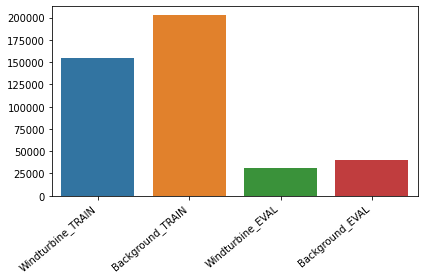

In [19]:
keys = list(number_classes.keys())
values = list(number_classes.values())
ax = sns.barplot(x=keys, y=values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
for n,d in directories.items():
filepath = d
filelist = [filepath + f for f in os.listdir(filepath)]
dims = bag.from_sequence(filelist).map(get_dims)
with diagnostics.ProgressBar():
dims = dims.compute()
dim_df = pd.DataFrame(dims, columns=['height', 'width'])
sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
sizes.plot.scatter(x='width', y='height');
plt.title('Image Sizes (pixels) | {}'.format(n))

In [ ]:
directories = {'Class_0': 'data/Class_0/',
'Class_1': 'data/Class_1/',
'Class_2': 'data/Class_2/',
'Class_3': 'data/Class_3/'}

def get_dims(file):
'''Returns dimenstions for an RBG image'''
im = Image.open(file)
arr = np.array(im)
h,w,d = arr.shape
return h,w